<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/A(10%EA%B0%95_rnn_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

all_data.head(10)= Price                     Adj Close   Open   High    Low  Close     Volume
Ticker                         AAPL   AAPL   AAPL   AAPL   AAPL       AAPL
Date                                                                      
2017-01-03 00:00:00+00:00     26.92  28.95  29.08  28.69  29.04  115127600
2017-01-04 00:00:00+00:00     26.89  28.96  29.13  28.94  29.00   84472400
2017-01-05 00:00:00+00:00     27.03  28.98  29.22  28.95  29.15   88774400
2017-01-06 00:00:00+00:00     27.33  29.19  29.54  29.12  29.48  127007600
2017-01-09 00:00:00+00:00     27.58  29.49  29.86  29.49  29.75  134247600
2017-01-10 00:00:00+00:00     27.61  29.69  29.84  29.58  29.78   97848400
2017-01-11 00:00:00+00:00     27.76  29.68  29.98  29.65  29.94  110354400
2017-01-12 00:00:00+00:00     27.64  29.73  29.83  29.55  29.81  108344800
2017-01-13 00:00:00+00:00     27.59  29.78  29.91  29.70  29.76  104447600
2017-01-17 00:00:00+00:00     27.81  29.58  30.06  29.56  30.00  137759200
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0193
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 8.3713e-04
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 4.0906e-04
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 3.0238e-04
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.8104e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.6082e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.9308e-04
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.5968e-04
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.5247e-04
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.2750e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


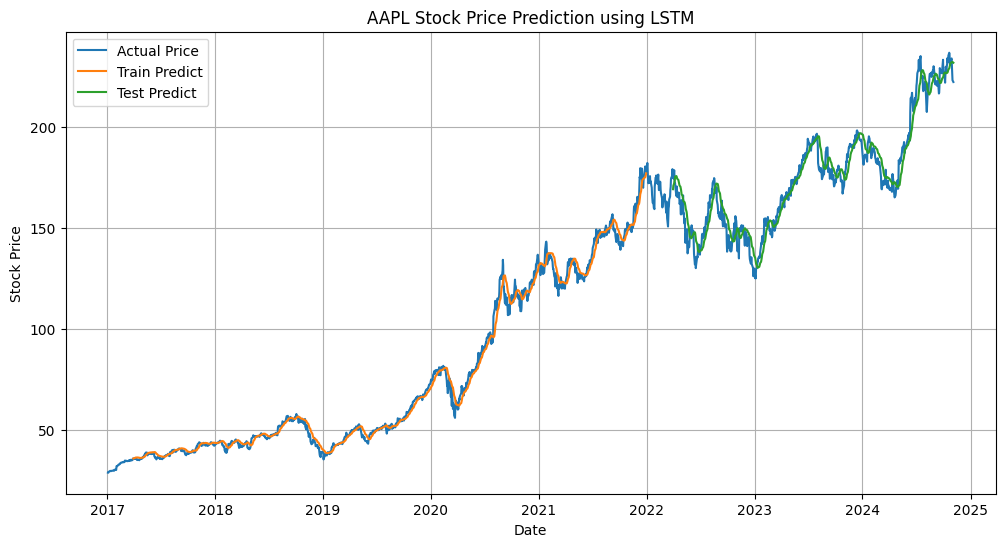

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

AAPL = yf.download('AAPL',
                  start = '2017-01-01',
                  end = '2024-12-31',
                  progress = False)

# 수정종가(Adj close), 시가(Open), 최고가(High), 최저가(Low), 종가(Close). 거래량(Volume)
all_data = AAPL[['Adj Close', 'Open', 'High','Low',"Close","Volume"]].round(2)
all_data.head(10)
print("all_data.head(10)=", all_data.head(10))

"""
참고자료 : 2017년까지의 데이터, 2024년 이후의 데이터, 수정종가 그래프
print("There are "+str(all_data[:'2017'].shape[0])+" observations in the training data")
print("There are "+str(all_data['2024':].shape[0])+" observations in the test data")
all_data['Adj Close'].plot()
"""
data = all_data[['Close']]  # 종가 데이터만 사용


# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 데이터 정규화
scaled_data = scaler.fit_transform(data)

"""
# 학습 데이터와 테스트 데이터를 나누는 인덱스 설정 (예: 80% 학습, 20% 테스트)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
"""

# Use date-based indexing on the original DataFrame 'data'
train_data = scaled_data[:len(data[:'2021'])] # Select data up to 2018 for training
test_data = scaled_data[len(data[:'2021']):] # Select data from 2019 onwards for testing


# LSTM 입력 형식으로 데이터 준비
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0]) # x의 0번째 열에서 i 번째 행부터 i + time_step째 행까지의 값을 선택합니다.
        Y.append(dataset[i + time_step, 0])     # y의 time_step번째 행, 0번째 열에 있는 값을 가져옵니다.
    return np.array(X), np.array(Y)

time_step = 60  # 과거 60일 데이터를 기반으로 예측
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Check if X_test is empty and handle accordingly
if X_test.size == 0:
    print("Not enough data points in test_data to create sequences with the given time_step.")
    # Option 1: Reduce time_step
    time_step = len(test_data) - 2  # Adjust as needed to ensure at least one sequence is created
    X_test, y_test = create_dataset(test_data, time_step)
    # if this still results in an empty X_test, you might need to consider other options
    if X_test.size == 0:
        print("Even after reducing time_step, X_test is empty. Skipping testing.")
        exit()  # or handle this situation differently

# LSTM 모델 입력 형태로 데이터 재구성 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# 3. LSTM 모델 정의
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# 4. 모델 컴파일과 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

# 5. 예측 및 결과 시각화
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 결과를 원래 값으로 되돌리기 (역정규화)
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

# 6. 시각화
plt.figure(figsize=(12, 6)) #figsize=(12, 6)은 생성된 그래프의 가로가 12인치, 세로가 6인치가 되도록 설정

#data.index는 이 DataFrame의 인덱스를 가져옵니다. 일반적으로 주식 데이터에서는 인덱스가 날짜로 설정되어 있어, x축에 날짜가 표시됩니다.
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(data.index[time_step:time_step+len(train_predict)], train_predict, label='Train Predict')
plt.plot(data.index[len(data) - len(test_predict):], test_predict.flatten(), label='Test Predict')  # flatten test_predict to 1D

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction using LSTM")
plt.legend()
plt.grid()  # 격자선 추가
plt.show()

